# Differential gene expression between PABPN1 mutants

In [52]:
###Load Packages

#Functions for polyA specific analysis (must be in same path)
from polyA_utils import *

#Packages for general column manipulation and statistics
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from scipy import stats
import scipy.stats as sci
import pysam

#Packages for plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style("ticks")

Differential gene expression was initially performed using Salmon to quantify expression values and then DESeq2 in R to quantify DE. The code in this notebook imports the results dataframes for figure.

In [53]:
#Set datapath for DESeq2 analyses
path = "/path/to/data/"

In [54]:
figpath = "./"

In [55]:
#Load in the previously generated dataframes 
DE_EV_WT = pd.read_csv(path + "Diff_exp_resdf_EV_WT.txt", sep = " ").dropna()
DE_EV_WT = DE_EV_WT.rename(columns={"row": "gene_id", "symbol": "gene_name"})

DE_WT_4SA = pd.read_csv(path + "Diff_exp_resdf_WT_4SA.txt", sep = " ").dropna()
DE_WT_4SA = DE_WT_4SA.rename(columns={"row": "gene_id", "symbol": "gene_name"})

DE_WT_4SD = pd.read_csv(path + "Diff_exp_resdf_WT_4SD.txt", sep = " ").dropna()
DE_WT_4SD = DE_WT_4SD.rename(columns={"row": "gene_id", "symbol": "gene_name"})

DE_4SA_4SD = pd.read_csv(path + "Diff_exp_resdf_4SA_4SD.txt", sep = " ").dropna()
DE_4SA_4SD = DE_4SA_4SD.rename(columns={"row": "gene_id", "symbol": "gene_name"})

Generate volcano plots to show differentially expressed genes with annotations

In [56]:
np.unique(DE_EV_WT.type)

array(['3prime_overlapping_ncrna', 'Mt_rRNA', 'Mt_tRNA', 'TEC',
       'TR_V_pseudogene', 'antisense', 'lincRNA', 'macro_lncRNA', 'miRNA',
       'misc_RNA', 'polymorphic_pseudogene', 'processed_pseudogene',
       'processed_transcript', 'protein_coding', 'rRNA', 'ribozyme',
       'sense_intronic', 'sense_overlapping', 'snRNA', 'snoRNA',
       'transcribed_processed_pseudogene',
       'transcribed_unprocessed_pseudogene', 'unitary_pseudogene',
       'unprocessed_pseudogene'], dtype=object)

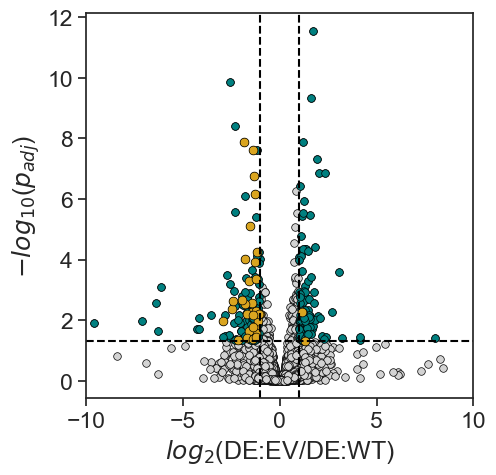

In [70]:
#Set whether to annotate
Annotate = False

#EV vs WT
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = DE_EV_WT.loc[(DE_EV_WT["log2FoldChange"] >= 1) & (DE_EV_WT["padj"] <= 0.05)]
downreg = DE_EV_WT.loc[(DE_EV_WT["log2FoldChange"] <= -1) & (DE_EV_WT["padj"] <= 0.05)]

sns.scatterplot(data = DE_EV_WT, x = "log2FoldChange", y = -np.log10(DE_EV_WT["padj"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = "log2FoldChange", y = -np.log10(upreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = "log2FoldChange", y = -np.log10(downreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)

#Label antisense RNAs
sns.scatterplot(data = upreg.loc[upreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(upreg.loc[upreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg.loc[downreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(downreg.loc[downreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5)

ax.axvline(-1, color = "black", linestyle = "--")
ax.axvline(1, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_xlabel("$log_{2}$(DE:EV/DE:WT)")
ax.set_ylabel("$-log_{10}$($p_{adj}$)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["gene_name"][i], ((upreg["log2FoldChange"][i]), (-np.log10(upreg["padj"][i]) + 0.2)), fontsize = 8) 

    for i in downreg.index: 
        plt.annotate(downreg["gene_name"][i], ((downreg["log2FoldChange"][i] - 5), (-np.log10(downreg["padj"][i]) + 0.2)), fontsize = 8) 

plt.savefig(figpath + 'RNA_levels_Illumina_EV_WT.png', dpi=300, bbox_inches="tight")

In [58]:
downreg.loc[downreg.type == "antisense"]

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,type
16437,ENSG00000225953,39.425755,-1.404293,0.342121,-4.104665,4.049019e-05,5.455079e-03,SATB2-AS1,antisense
16735,ENSG00000227896,181.139824,-1.012062,0.249533,-4.055817,4.995931e-05,6.310138e-03,RP11-77P6.2,antisense
16891,ENSG00000228801,150.039216,-1.231707,0.297810,-4.135875,3.536044e-05,5.104252e-03,RP11-110G21.1,antisense
17243,ENSG00000231154,70.622201,-1.344661,0.371149,-3.622964,2.912466e-04,1.991426e-02,MORF4L2-AS1,antisense
17318,ENSG00000231646,13.458832,-2.129749,0.641987,-3.317432,9.084903e-04,4.413727e-02,FSIP2-AS1,antisense
17341,ENSG00000231764,174.154072,-1.405246,0.324551,-4.329814,1.492351e-05,2.687414e-03,DLX6-AS1,antisense
17791,ENSG00000234684,113.384933,-1.224339,0.328019,-3.732527,1.895683e-04,1.518884e-02,SDCBP2-AS1,antisense
18014,ENSG00000235919,155.523588,-1.317058,0.204374,-6.444350,1.160972e-10,1.759646e-07,ASH1L-AS1,antisense
18240,ENSG00000237424,412.955782,-1.380795,0.202704,-6.811894,9.632200e-12,2.502721e-08,FOXD2-AS1,antisense
18461,ENSG00000239791,49.475305,-1.228858,0.349583,-3.515210,4.394056e-04,2.718337e-02,AC002310.7,antisense


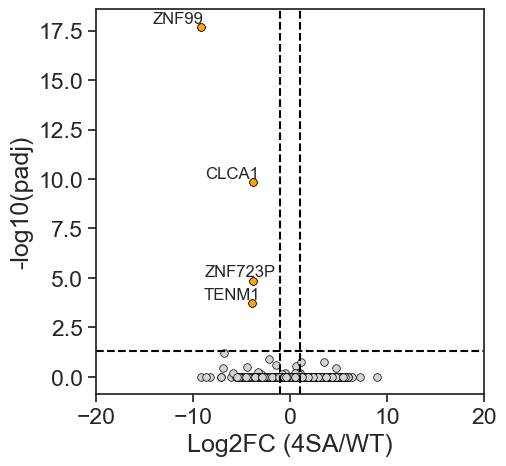

In [59]:
#Set whether to annotate
Annotate = True

#WT vs 4SA
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = DE_WT_4SA.loc[(DE_WT_4SA["log2FoldChange"] >= 1) & (DE_WT_4SA["padj"] <= 0.05)]
downreg = DE_WT_4SA.loc[(DE_WT_4SA["log2FoldChange"] <= -1) & (DE_WT_4SA["padj"] <= 0.05)]

sns.scatterplot(data = DE_WT_4SA, x = "log2FoldChange", y = -np.log10(DE_WT_4SA["padj"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = "log2FoldChange", y = -np.log10(upreg["padj"]), s = 30, alpha = 1, color = "steelblue", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = "log2FoldChange", y = -np.log10(downreg["padj"]), s = 30, alpha = 1, color = "orange", edgecolor = "black", linewidth = 0.5)

ax.axvline(-1, color = "black", linestyle = "--")
ax.axvline(1, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-20, 20)
ax.set_xlabel("Log2FC (4SA/WT)")
ax.set_ylabel("-log10(padj)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["gene_name"][i], ((upreg["log2FoldChange"][i]), (-np.log10(upreg["padj"][i]) + 0.2)), fontsize = 12) 

    for i in downreg.index: 
        plt.annotate(downreg["gene_name"][i], ((downreg["log2FoldChange"][i] - 5), (-np.log10(downreg["padj"][i]) + 0.2)), fontsize = 12) 

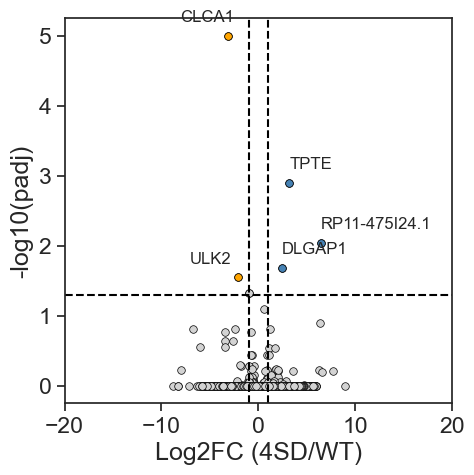

In [60]:
#Set whether to annotate
Annotate = True

#WT vs 4SD
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = DE_WT_4SD.loc[(DE_WT_4SD["log2FoldChange"] >= 1) & (DE_WT_4SD["padj"] <= 0.05)]
downreg = DE_WT_4SD.loc[(DE_WT_4SD["log2FoldChange"] <= -1) & (DE_WT_4SD["padj"] <= 0.05)]

sns.scatterplot(data = DE_WT_4SD, x = "log2FoldChange", y = -np.log10(DE_WT_4SD["padj"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = "log2FoldChange", y = -np.log10(upreg["padj"]), s = 30, alpha = 1, color = "steelblue", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = "log2FoldChange", y = -np.log10(downreg["padj"]), s = 30, alpha = 1, color = "orange", edgecolor = "black", linewidth = 0.5)

ax.axvline(-1, color = "black", linestyle = "--")
ax.axvline(1, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-20, 20)
ax.set_xlabel("Log2FC (4SD/WT)")
ax.set_ylabel("-log10(padj)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["gene_name"][i], ((upreg["log2FoldChange"][i]), (-np.log10(upreg["padj"][i]) + 0.2)), fontsize = 12) 

    for i in downreg.index: 
        plt.annotate(downreg["gene_name"][i], ((downreg["log2FoldChange"][i] - 5), (-np.log10(downreg["padj"][i]) + 0.2)), fontsize = 12) 

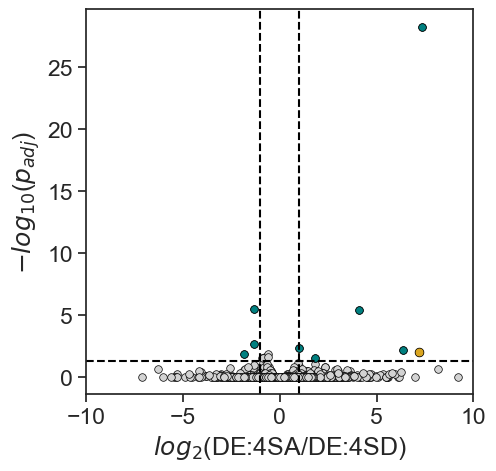

In [71]:
#Set whether to annotate
Annotate = False

#4SA vs 4SD
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = DE_4SA_4SD.loc[(DE_4SA_4SD["log2FoldChange"] >= 1) & (DE_4SA_4SD["padj"] <= 0.05)]
downreg = DE_4SA_4SD.loc[(DE_4SA_4SD["log2FoldChange"] <= -1) & (DE_4SA_4SD["padj"] <= 0.05)]

sns.scatterplot(data = DE_4SA_4SD, x = "log2FoldChange", y = -np.log10(DE_4SA_4SD["padj"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = "log2FoldChange", y = -np.log10(upreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = "log2FoldChange", y = -np.log10(downreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)

#Label antisense RNAs
sns.scatterplot(data = upreg.loc[upreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(upreg.loc[upreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg.loc[downreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(downreg.loc[downreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5)

ax.axvline(-1, color = "black", linestyle = "--")
ax.axvline(1, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_xlabel("$log_{2}$(DE:4SA/DE:4SD)")
ax.set_ylabel("$-log_{10}$($p_{adj}$)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["gene_name"][i], ((upreg["log2FoldChange"][i]), (-np.log10(upreg["padj"][i]) + 0.2)), fontsize = 12) 

    for i in downreg.index: 
        plt.annotate(downreg["gene_name"][i], ((downreg["log2FoldChange"][i] - 5), (-np.log10(downreg["padj"][i]) + 0.2)), fontsize = 12) 
        
plt.savefig(figpath + 'RNA_levels_Illumina_4SA_4SD.png', dpi=300, bbox_inches="tight")